<center> <h1>🐳 A Whale Portfolio analysis</h1> </center>

Evaluating the performance of algorithmic, hedge, and mutual fund portfolios and comparing them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

## Whale Returns of Soros, Paulson,Tiger and Berkshire

In [2]:
# Reading whale returns 
whale_path = Path('./Resources/whale_returns.csv')
whale_returns = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [3]:
# Count nulls .isnull()
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls .dropna()
whale_returns.dropna(inplace=True)
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
whale_returns.describe

<bound method NDFrame.describe of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496 

## Algorithm 1 and Algorithm 2 Daily Returns

In [6]:
# Reading algorithmic returns 
algo_path = Path('./Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.columns = ['Algorithm 1 ', 'Algorithm 2']

algo_returns.isnull().sum()

Algorithm 1     0
Algorithm 2     0
dtype: int64

In [9]:
algo_returns.describe

<bound method NDFrame.describe of             Algorithm 1   Algorithm 2
Date                                 
2014-06-05      0.004062     0.013285
2014-06-06      0.001857     0.008284
2014-06-09     -0.005012     0.005668
2014-06-10      0.004406    -0.000735
2014-06-11      0.004760    -0.003761
...                  ...          ...
2019-04-25      0.000682    -0.007247
2019-04-26      0.002981     0.005256
2019-04-29      0.005208     0.002829
2019-04-30     -0.002944    -0.001570
2019-05-01      0.000094    -0.007358

[1235 rows x 2 columns]>

## S&P 500 Returns

In [10]:
# Reading S&P 500 Closing Prices
sp500_path = Path('./Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [11]:
# Check Data Types
print( f" {sp500_df['Close'][0]} {type(sp500_df['Close'][1])}")

 $2933.68 <class 'str'>


In [12]:
# Fix Data Types 
sp500_df2 = sp500_df['Close'].str.removeprefix("$").to_frame().astype(float)
sp500_df2.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [13]:
# Calculate Daily Returns
sp500_returns = sp500_df2.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [14]:
# Drop nulls
sp500_returns.dropna(inplace=True)

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns =['sp500']

## Combined Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns. pd.concat()
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns] ,join='inner',axis=1)
combined_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algorithm 1,Algorithm 2,sp500
Date,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764


---

## Performance Analysis

<AxesSubplot:xlabel='Date'>

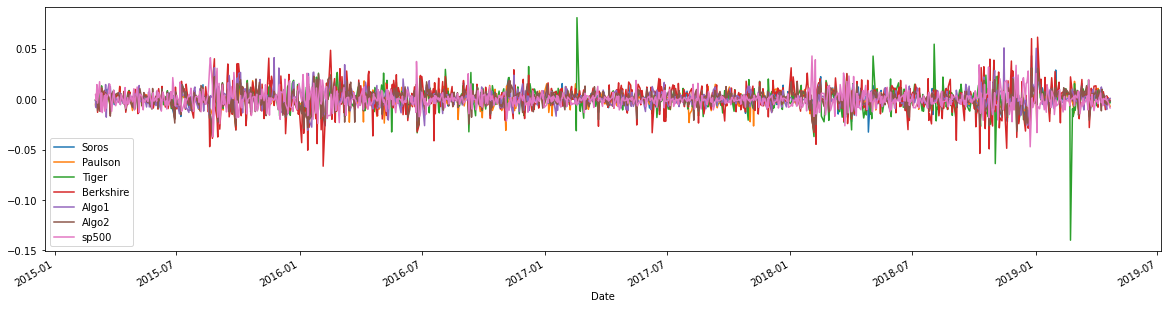

In [17]:
# Plot daily returns of all portfolios
daily_returns = combined_returns
daily_returns.columns = ['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo1', 'Algo2','sp500']
daily_returns.plot(figsize=(20,5))

## Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

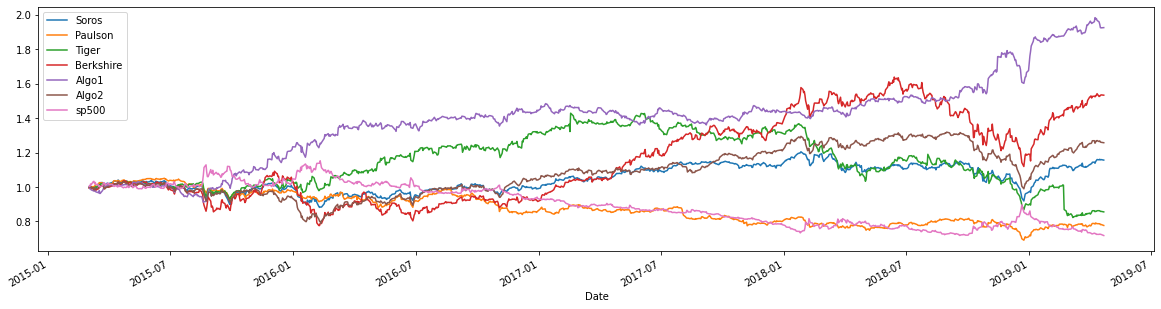

In [18]:
# Calculate cumulative returns of all portfolios
cumultive_returns = (1 + combined_returns).cumprod()
# Plot cumulative returns
cumultive_returns.plot(figsize=(20,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

## Create a box plot for each portfolio


<AxesSubplot:>

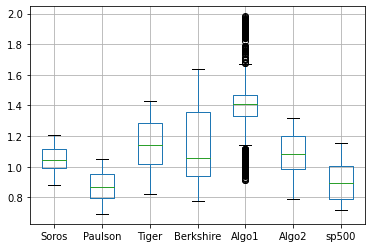

In [19]:
# Box plot to visually show risk
cumultive_returns.columns = ['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo1', 'Algo2','sp500']
cumultive_returns.boxplot()

## Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
cumultive_returns_std = cumultive_returns.std()

## Determine which portfolios are riskier than the S&P 500

In [21]:
# Determine which portfolios are riskier than the S&P 500
sp500 = cumultive_returns_std['sp500']
index = 0
for risk in cumultive_returns_std:
    if risk == sp500:
        print(f"{cumultive_returns_std.index[index]} Portfolio has as equal risk as S&P500")
    elif risk > sp500:
        print(f"{cumultive_returns_std.index[index]} Portfolio has more risk than S&P500")
    elif risk < sp500:
        print(f"{cumultive_returns_std.index[index]} Prtfolio has less risk than S&P500")
    else:
        print(f"{cumultive_returns_std.index[index]} Portfolio has no enough data to determine risk")
    index += 1

Soros Prtfolio has less risk than S&P500
Paulson Prtfolio has less risk than S&P500
Tiger Portfolio has more risk than S&P500
Berkshire Portfolio has more risk than S&P500
Algo1 Portfolio has more risk than S&P500
Algo2 Portfolio has more risk than S&P500
sp500 Portfolio has as equal risk as S&P500


## Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annulized_std = cumultive_returns_std * np.sqrt(252)

---

## Rolling Statistics

<AxesSubplot:title={'center':'Rolling std for all portfolios with 21-day window'}, xlabel='Date'>

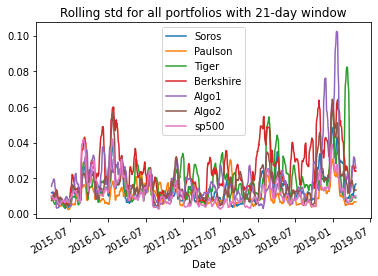

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window 
rolling_std = cumultive_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(title='Rolling std for all portfolios with 21-day window')

<AxesSubplot:title={'center':'Correlation for Newly Combined portfolios'}>

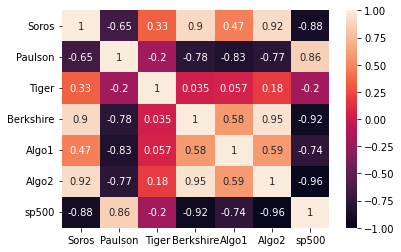

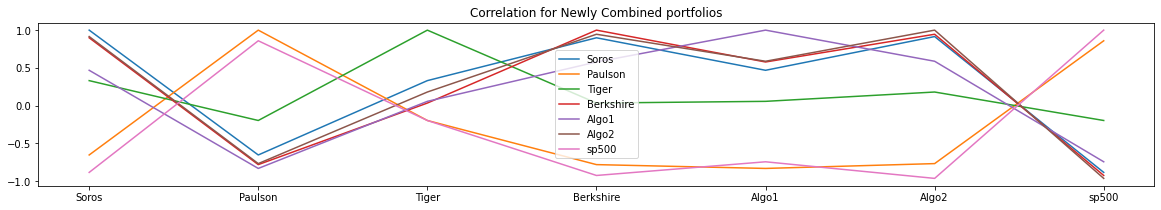

In [24]:
# Calculate the correlation
correlation_matrix = cumultive_returns.corr()

# Display de correlation matrix
sns.heatmap(correlation_matrix,  vmin=-1, vmax=1,annot=True)
correlation_matrix.plot(figsize=(20,3), title='Correlation for Newly Combined portfolios')

## Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta trend of Algo 1'}, xlabel='Date'>

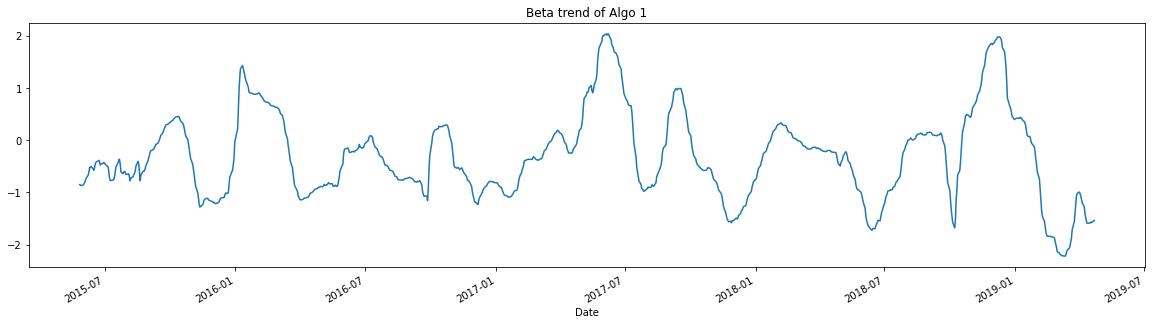

In [25]:
# Calculate covariance of a single portfolio
rolling_covariance_algo1 = cumultive_returns['Algo1'].rolling(window=60).cov(cumultive_returns['sp500'])

# Calculate variance of S&P 500
rolling_variance_SP500 = cumultive_returns['sp500'].rolling(window=60).var()

# Computing beta
algo1_beta = rolling_covariance_algo1 / rolling_variance_SP500

# Plot beta trend
algo1_beta.plot(figsize=(20,5), title='Beta trend of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [26]:
# Use `ewm` to calculate the rolling window
cumultive_returns_std.ewm(halflife=21).mean()

Soros        0.073187
Paulson      0.080943
Tiger        0.104606
Berkshire    0.140511
Algo1        0.159988
Algo2        0.154865
sp500        0.148567
dtype: float64

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

## Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Sharpe Ratios
sharpe_ratio = (daily_returns.mean() - daily_returns['sp500'].mean())/(daily_returns.std())

<AxesSubplot:title={'center':'Daily Sharpe Ratios'}>

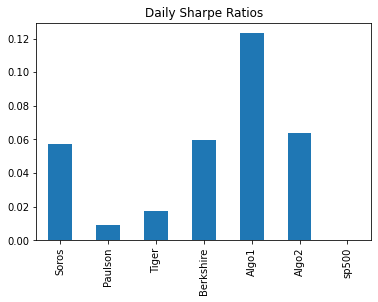

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar',  title="Daily Sharpe Ratios")

## Algorithmic strategies perfromance compared to both the market (S&P 500) and the whales portfolios.

In [29]:
# set variables
index=0
algo1_performance = sharpe_ratio['Algo1']

# Determine portfolio performance in comparison to Algo1
for performance in sharpe_ratio:
    if sharpe_ratio.index[index] == 'Algo1':
        continue
    if performance == algo1_performance:
        print(f"Algo1 equally performed compared to {combined_returns.columns[index]} portfolio")
    elif performance < algo1_performance:
        print(f"Algo1 outperfomed {combined_returns.columns[index]} portfolio")
    elif performance > algo1_performance:
        print(f"Algo1 underperformed compared to {combined_returns.columns[index]} portfolio")
    else:
        print(f"Sorry, you are not eligible to compete with the whales.")
    index+=1

Algo1 outperfomed Soros portfolio
Algo1 outperfomed Paulson portfolio
Algo1 outperfomed Tiger portfolio
Algo1 outperfomed Berkshire portfolio


In [30]:
# set variables
algo2_performance = sharpe_ratio['Algo2']   
index=0

# Determine portfolio performance in comparison to Algo2 
for performance in sharpe_ratio:
    if sharpe_ratio.index[index] == 'Algo2':
        continue
    if performance == algo2_performance:
        print(f"Algo2 equally performed compared to {combined_returns.columns[index]} portfolio")
    elif performance < algo2_performance:
        print(f"Algo2 outperfomed {combined_returns.columns[index]} portfolio")
    elif performance > algo2_performance:
        print(f"Algo2 underperformed compared to {combined_returns.columns[index]} portfolio")
    else:
        print(f"Sorry, you are not eligible to compete with the whales.")
    index+=1

Algo2 outperfomed Soros portfolio
Algo2 outperfomed Paulson portfolio
Algo2 outperfomed Tiger portfolio
Algo2 outperfomed Berkshire portfolio
Algo2 underperformed compared to Algo1 portfolio


---

## Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Google, Tesla and Twitter

In [31]:
# Reading data from 1st stock "Google"
goog_csv_path = Path("./custom_portfolio/GOOG.csv")
goog_df = pd.read_csv(goog_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [32]:
# Reading data from 2nd stock "Tesla"
tsla_csv_path = Path("./custom_portfolio/TSLA.csv")
tsla_df = pd.read_csv(tsla_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [33]:
# Reading data from 3rd stock "Twitter"
twtr_csv_path = Path("./custom_portfolio/TWTR.csv")
twtr_df = pd.read_csv(twtr_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [34]:
# Combine all stocks in a single DataFrame & reorganize portfolio data by having a column per symbol
my_stocks = pd.concat([goog_df.Close, tsla_df.Close, twtr_df.Close], axis="columns", join="inner") 
my_stocks.columns = ['goog','tsla','twtr']

In [35]:
# Reset Date index
my_stocks.sort_index(inplace=True)

In [36]:
# Calculate daily returns & Drop NAs
daily_returns = my_stocks.pct_change()
daily_returns.dropna(inplace = True)
# Display sample data
daily_returns.describe

<bound method NDFrame.describe of                 goog      tsla      twtr
Date                                    
2014-03-28  0.002740  0.024358  0.021157
2014-03-31 -0.005393 -0.018458 -0.013319
2014-04-01  0.018295  0.040873  0.006642
2014-04-02 -0.000282  0.061391 -0.026607
2014-04-03  0.004832 -0.021234 -0.036737
...              ...       ...       ...
2018-03-21 -0.006222  0.019256  0.044019
2018-03-22 -0.038318 -0.023473 -0.046746
2018-03-23 -0.026223 -0.024458 -0.005449
2018-03-26  0.030972  0.008755  0.028360
2018-03-27 -0.045679 -0.082188 -0.120338

[1006 rows x 3 columns]>

## Weighted returns with an equal number of shares for each stock

<AxesSubplot:title={'center':'Daily Returns for my porfolio'}, xlabel='Date'>

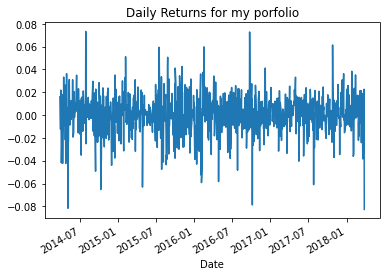

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns  = daily_returns.dot(weights)
my_portfolio_returns.plot(title= 'Daily Returns for my porfolio')

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns['my portfolio'] = my_portfolio_returns
joined_portfolios = combined_returns

In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_portfolios.dropna(inplace = True)
joined_portfolios.head()

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,sp500,my portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.002071
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.003667
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,-0.003374
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.019868
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.001516


## Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
joined_portfolios_std = joined_portfolios.std()
annulized_std = joined_portfolios_std * np.sqrt(252)

## Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day standard deviation'}, xlabel='Date'>

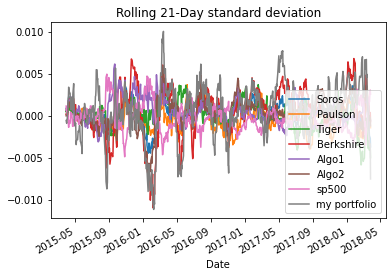

In [41]:
# Calculate rolling standard deviation
joined_portfolios_rolling_std = joined_portfolios.rolling(window=21).mean()

# Plot rolling standard deviation
joined_portfolios_rolling_std.plot(title='Rolling 21-Day standard deviation')

## Calculate and plot the correlation

<AxesSubplot:title={'center':'Correlation for Newly Combined portfolios'}>

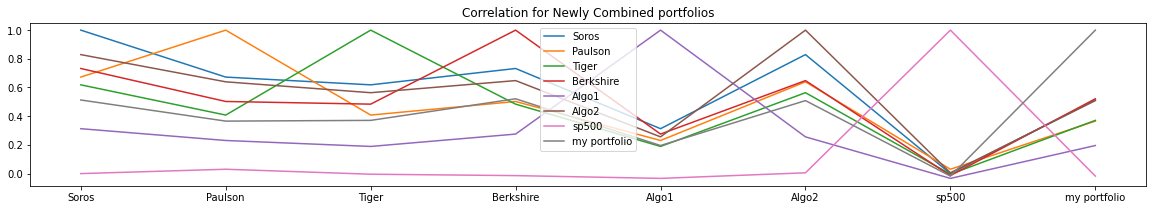

In [42]:
# Calculate and plot the correlation
new_correlation = joined_portfolios.corr()
new_correlation.plot(figsize=(20,3), title='Correlation for Newly Combined portfolios')

## Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling Beta of my portfolio compared to S&P 500'}, xlabel='Date'>

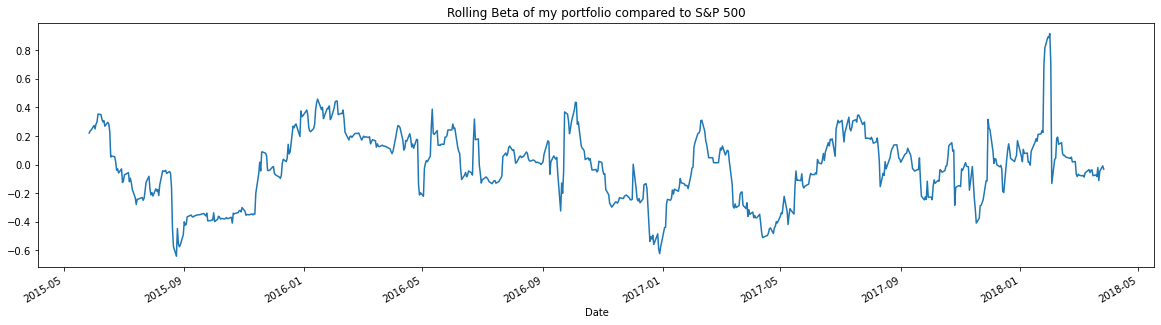

In [43]:
# Calculate and plot Beta
new_covariance = joined_portfolios['my portfolio'].rolling(window=60).cov(joined_portfolios['sp500'])
new_variance = joined_portfolios['sp500'].rolling(window=60).var()

joined_portfolios_rolling_beta = new_covariance / new_variance
joined_portfolios_rolling_beta.plot(figsize=(20, 5), title='Rolling Beta of my portfolio compared to S&P 500')

## Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = ((joined_portfolios.mean()-joined_portfolios['sp500'].mean()) * 252) / (joined_portfolios.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe ratio'}>

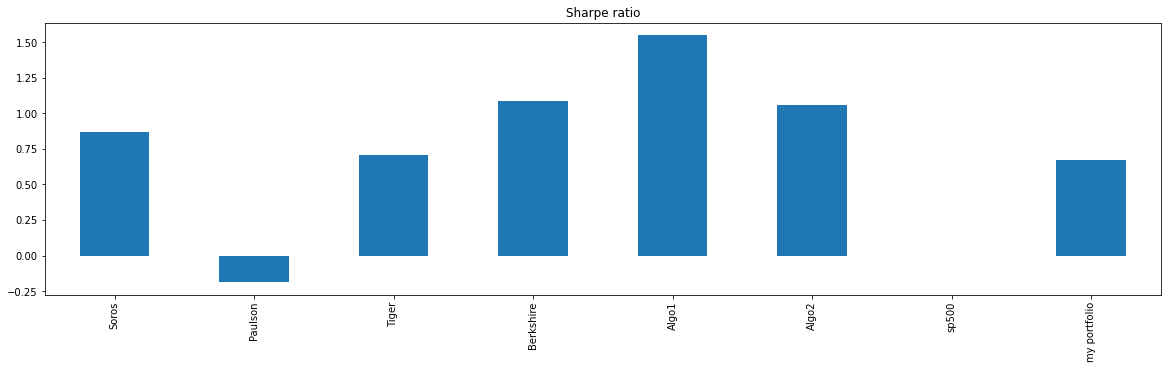

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title='Sharpe ratio',figsize=(20,5))

## My portfolio results?

In [46]:
# Set variables
index=0
my_performance = sharpe_ratio['my portfolio']

# Determine portfolio performance in comparison to Algo1
for performance in sharpe_ratio:
    if sharpe_ratio.index[index] == 'my portfolio':
        continue
    if performance == my_performance:
        print(f"My portfolio equally performed compared to {joined_portfolios.columns[index]} portfolio")
    elif performance < my_performance:
        print(f"My portfolio outperfomed {joined_portfolios.columns[index]} portfolio")
    elif performance > my_performance:
        print(f"My portfolio underperformed compared to {joined_portfolios.columns[index]} portfolio")
    else:
        print(f"Sorry, you are not eligible to compete with the whales.")
    index+=1

My portfolio underperformed compared to Soros portfolio
My portfolio outperfomed Paulson portfolio
My portfolio underperformed compared to Tiger portfolio
My portfolio underperformed compared to Berkshire portfolio
My portfolio underperformed compared to Algo1 portfolio
My portfolio underperformed compared to Algo2 portfolio
My portfolio outperfomed sp500 portfolio
